# **1. Importing necessary libraries for data manipulation and analysis**


## Importing necessary libraries for machine learning



In [1]:
# Importing necessary libraries for data manipulation and analysis
import numpy as np  # NumPy is used for numerical operations
import pandas as pd  # Pandas is used for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib is used for creating static, animated, and interactive visualizations
import seaborn as sns  # Seaborn is used for statistical data visualization based on Matplotlib
import sqlite3 as sql  # SQLite3 is used for database operations

# Importing necessary libraries for machine learning
from joblib import load, dump  # Joblib is used for saving and loading scikit-learn models
from sklearn.decomposition import PCA  # PCA is used for Principal Component Analysis
from sklearn import tree  # Tree is used for decision tree based models
from sklearn.naive_bayes import GaussianNB  # GaussianNB is used for Naive Bayes classifier for Gaussian models
from sklearn.linear_model import LogisticRegression  # LogisticRegression is used for logistic regression models
from sklearn.neighbors import KNeighborsClassifier  # KNeighborsClassifier is used for k-nearest neighbors classification
from sklearn.tree import DecisionTreeClassifier  # DecisionTreeClassifier is used for decision tree classification
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder  # These are used for data preprocessing
from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier is used for random forest classification
from sklearn.model_selection import train_test_split, cross_val_score  # These are used for splitting the data and cross validation
from sklearn import svm  # SVM is used for Support Vector Machines
from sklearn import metrics  # Metrics is used for calculating the accuracy and performance of the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay  # These are used for calculating the accuracy, precision, recall, confusion matrix

# Setting the maximum number of columns to be displayed to unlimited
pd.set_option('display.max_columns', None)

C:\Users\andre\AppData\Local\Temp\ipykernel_23172\3557356290.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # Pandas is used for data manipulation and analysis


In [2]:
# Define the path to the SQLite database file

# Commented out: Roberto's file path to the database
#db_path = 'C:/Users/rober/SQLite/CyberSentryDB.db'

# Andres's file path to the database
db_path = 'C:/Users/andre/SQLite/CyberSentryDB.db'

# Establish a connection to the SQLite database specified by db_path
conn = sql.connect(db_path)

# Create a cursor object. This object is used to execute SQL queries
cursor = conn.cursor()

# Execute a SQL query to select all records from the 'testing_data' table
# and store the result in a pandas DataFrame 'df_test' for further analysis
df_test = pd.read_sql_query("SELECT * FROM testing_data", conn)

# Execute a SQL query to select all records from the 'training_data' table
# and store the result in a pandas DataFrame 'df_train' for further analysis
df_train = pd.read_sql_query("SELECT * FROM training_data", conn)

# Close the cursor. This is done to release database resources
cursor.close()

# Close the connection to the database. This is done to ensure data integrity and release resources
conn.close()

In [3]:
# Define a list of column names for the dataframes
columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome',
    'level'
]

# Assign the defined column names to the 'df_train' dataframe
df_train.columns = columns

# Assign the defined column names to the 'df_test' dataframe
df_test.columns = columns

In [4]:
# Concatenate 'df_train' and 'df_test' dataframes into a new dataframe 'df_all'
# The 'ignore_index' parameter is set to True, so the new dataframe will have its own index
df_all = pd.concat([df_train, df_test], ignore_index=True)

# Reset the index of the 'df_all' dataframe and drop the old index
# The 'drop' parameter is set to True, so the old index will not be added as a new column in the dataframe
df_all = df_all.reset_index(drop=True)

In [5]:
# Display the first 5 rows of the 'df_train' dataframe
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
# Display the first 5 rows of the 'df_test' dataframe
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [7]:
# Display the first 5 rows of the 'df_all' dataframe
df_all.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


------------------------------

# **2. Data Analysis**

In [8]:
# Print the number of unique values in the 'protocol_type' column of the 'df_train' dataframe
print(f"numbers of protocol_type: {len(df_train['protocol_type'].value_counts())}")

# Print the number of unique values in the 'service' column of the 'df_train' dataframe
print(f"number of 'service' in train datasets: {len(df_train.service.value_counts())}")

# Print the number of unique values in the 'flag' column of the 'df_train' dataframe
print(f"number of 'flag' in train datasets: {len(df_train['flag'].value_counts())}")

numbers of protocol_type: 3
number of 'service' in train datasets: 70
number of 'flag' in train datasets: 11


In [9]:
# Concatenate the value counts of the 'service' column from both 'df_test' and 'df_train' dataframes
# This is done along the columns (axis=1), resulting in a new dataframe 'new_df'
new_df = pd.concat([df_test['service'].value_counts(), df_train['service'].value_counts()], axis=1)

# Rename the columns of 'new_df' to 'KDDTest+' and 'KDDTrain+'
# The commented line is an alternative way to rename the columns
# new_df.rename(columns={'service':'KDDTest+', 'service':'KDDTrain+'}, inplace=True)
new_df.columns=['KDDTest+', 'KDDTrain+']

# Sort 'new_df' by the 'KDDTest+' column in descending order and display the first 10 rows
new_df.sort_values(by='KDDTest+', ascending=False).head(10)

,KDDTest+,KDDTrain+
service,,
http,7853.0,40338
private,4774.0,21853
telnet,1626.0,2353
pop_3,1019.0,264
smtp,934.0,7313
domain_u,894.0,9043
ftp_data,851.0,6860
other,838.0,4359
ecr_i,752.0,3077


In [10]:
# Sort the 'new_df' dataframe by the 'KDDTest+' column in descending order and display the first 10 rows
new_df.sort_values(by='KDDTest+', ascending=False).head(10)

,KDDTest+,KDDTrain+
service,,
http,7853.0,40338
private,4774.0,21853
telnet,1626.0,2353
pop_3,1019.0,264
smtp,934.0,7313
domain_u,894.0,9043
ftp_data,851.0,6860
other,838.0,4359
ecr_i,752.0,3077


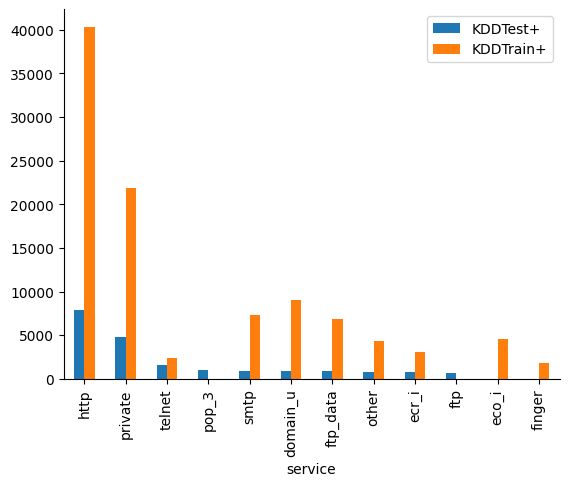

In [11]:
# Concatenate the top 10 value counts of the 'service' column from both 'df_test' and 'df_train' dataframes
# This is done along the columns (axis=1), and the result is plotted as a bar chart
# The plot is stored in the 'ax' object for further customization
ax = pd.concat([df_test['service'].value_counts().head(10),df_train['service'].value_counts().head(10)],axis=1).plot(kind='bar')

# Remove the top spine from the plot
ax.spines['top'].set_visible(False)

# Remove the right spine from the plot
ax.spines['right'].set_visible(False)

# Add a legend to the plot with labels 'KDDTest+' and 'KDDTrain+'
plt.legend(['KDDTest+', 'KDDTrain+'])

# Display the plot
plt.show()

In [12]:
# Get the top 10 most frequent values of the 'service' column in the 'df_test' dataframe and store them in 'test_top10'
test_top10 = df_test['service'].value_counts().head(10)

# Get the top 10 most frequent values of the 'service' column in the 'df_train' dataframe and store them in 'train_top10'
train_top10 = df_train['service'].value_counts().head(10)

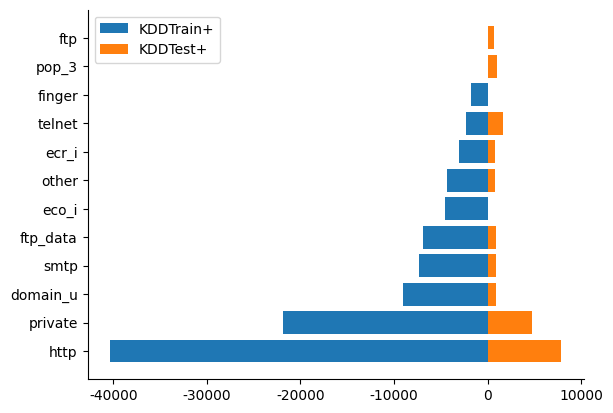

In [13]:
# Create a new figure and a set of subplots. This returns a Figure and an Axes object
fig, ax = plt.subplots()

# Set the 'axes.unicode_minus' parameter to False to properly display negative values
plt.rcParams['axes.unicode_minus']=False

# Create a horizontal bar plot for the 'train_top10' series with negative values
# This is done to display the bars on the left side of the y-axis
plt.barh(train_top10.index, -train_top10)

# Create a horizontal bar plot for the 'test_top10' series
# This is done to display the bars on the right side of the y-axis
plt.barh(test_top10.index, test_top10)

# Remove the top spine from the plot
ax.spines['top'].set_visible(False)

# Remove the right spine from the plot
ax.spines['right'].set_visible(False)

# Add a legend to the plot with labels 'KDDTrain+' and 'KDDTest+'
plt.legend(['KDDTrain+','KDDTest+'])

# Display the plot
plt.show()

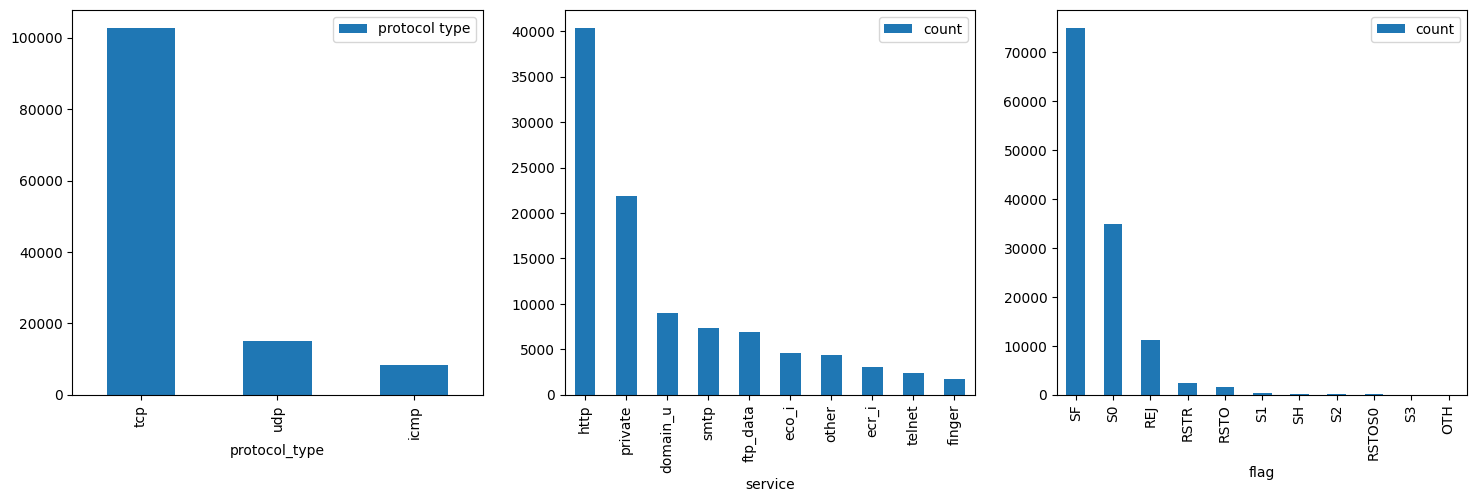

In [14]:
# Create a new figure with a specified size (18 units wide and 5 units tall)
plt.figure(figsize=(18, 5))

# Create the first subplot in a 1x3 grid (this will be the leftmost plot)
plt.subplot(131)

# Plot the value counts of the 'protocol_type' column in the 'df_train' dataframe as a bar chart
# The 'label' parameter is set to 'protocol type' for the legend
df_train["protocol_type"].value_counts().plot(kind='bar', label='protocol type')

# Add a legend to the plot
plt.legend()

# Create the second subplot in a 1x3 grid (this will be the middle plot)
plt.subplot(132)

# Plot the top 10 value counts of the 'service' column in the 'df_train' dataframe as a bar chart
df_train['service'].value_counts().head(10).plot(kind='bar')

# Add a legend to the plot
plt.legend()

# Create the third subplot in a 1x3 grid (this will be the rightmost plot)
plt.subplot(133)

# Plot the value counts of the 'flag' column in the 'df_train' dataframe as a bar chart
df_train["flag"].value_counts().plot(kind='bar')

# Add a legend to the plot
plt.legend()

# Display the figure and its subplots
plt.show()

In [15]:
df_train.outcome.unique()# Get the unique values in the 'outcome' column of the 'df_train' dataframe

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [16]:
# Define a list 'class_DoS' containing the names of DoS (Denial of Service) attack types
class_DoS = ['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 
             'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm']

# Define a list 'class_Probe' containing the names of Probe attack types
class_Probe = ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']

# Define a list 'class_U2R' containing the names of U2R (User to Root) attack types
class_U2R = ['buffer_overflow', 'loadmodule', 'perl', 'ps', 'rootkit', 'sqlattack', 'xterm']

# Define a list 'class_R2L' containing the names of R2L (Remote to Local) attack types
class_R2L = ['ftp_write', 'guess_passwd', 'httptunnel',  'imap', 'multihop', 'named', 
             'phf', 'sendmail', 'snmpgetattack', 'spy', 'snmpguess', 'warezclient', 
             'warezmaster', 'xlock', 'xsnoop']

# Define a list 'class_attack' containing the names of all attack types
class_attack = class_DoS + class_Probe + class_U2R + class_R2L

In [17]:
# Create a new column 'class' in the 'df_train' dataframe that is a copy of the 'outcome' column
df_train['class'] = df_train['outcome']

# Replace the values in the 'class' column that match any value in the 'class_attack' list with the string 'attack'
# The 'inplace=True' parameter means that the changes are made directly in the 'df_train' dataframe
df_train['class'].replace(class_attack, value='attack', inplace=True)

# Print the unique values in the 'class' column to check the replacement operation
print(df_train['class'].unique())

# Drop the 'outcome' and 'level' columns from the 'df_train' dataframe
# The 'inplace=True' parameter means that the changes are made directly in the 'df_train' dataframe
df_train.drop(columns=["outcome", "level"], inplace =True)

['normal' 'attack']


C:\Users\andre\AppData\Local\Temp\ipykernel_23172\3246052697.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['class'].replace(class_attack, value='attack', inplace=True)


In [18]:
# Get the number of rows and columns in the 'df_train' dataframe
df_train.shape

(125973, 42)

In [19]:
# Create a new column 'class' in the 'df_test' dataframe that is a copy of the 'outcome' column
df_test['class'] = df_test['outcome']

# Replace the values in the 'class' column that match any value in the 'class_attack' list with the string 'attack'
# The 'inplace=True' parameter means that the changes are made directly in the 'df_test' dataframe
df_test['class'].replace(class_attack, value='attack', inplace=True)

# Drop the 'outcome' and 'level' columns from the 'df_test' dataframe
# The 'inplace=True' parameter means that the changes are made directly in the 'df_test' dataframe
df_test.drop(columns=["outcome", "level"], inplace =True)

# Print the unique values in the 'class' column to check the replacement operation
print(df_test['class'].unique())

['attack' 'normal']


C:\Users\andre\AppData\Local\Temp\ipykernel_23172\1244723866.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['class'].replace(class_attack, value='attack', inplace=True)


In [20]:
# Get the number of rows and columns in the 'df_test' dataframe
df_test.shape

(22544, 42)

class
normal    67343
attack    58630
Name: count, dtype: int64


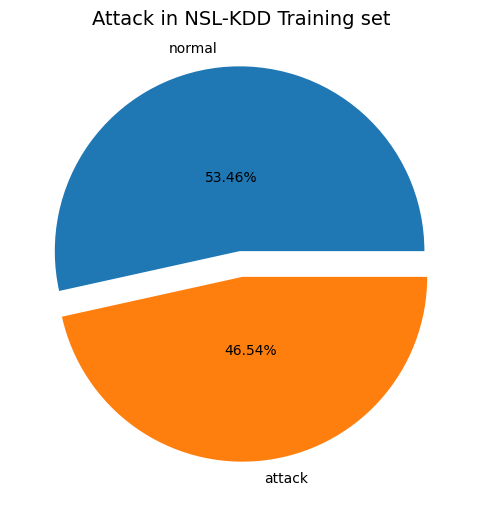

In [21]:
# Create a new figure and a set of subplots. This returns a Figure and an Axes object. The figure size is set to 10x6
pie, ax = plt.subplots(figsize=[10,6])

# Get the value counts of the 'class' column in the 'df_train' dataframe and shuffle the result
# The 'sample' function with 'frac=1.0' returns all rows in random order
class_data = df_train['class'].value_counts().sample(frac=1.0)

# Print the shuffled value counts
print(class_data)

# Create a pie chart of the shuffled value counts
# The 'explode' parameter is set to '[0.07]*len(class_data)' to slightly offset each slice from the center of the pie
# The 'pctdistance' parameter is set to '0.4' to position the percentage labels closer to the center of the pie
# The 'autopct' parameter is set to '"%.2f%%"' to format the percentage labels with 2 decimal places
ax.pie(x=class_data, labels=class_data.keys(), explode=[0.07]*len(class_data), pctdistance=0.4, autopct="%.2f%%")

# Set the title of the plot to 'Attack in NSL-KDD Training set' with a font size of 14
ax.set_title("Attack in NSL-KDD Training set", fontdict={'fontsize': 14})

# Display the figure and its subplots
plt.show()

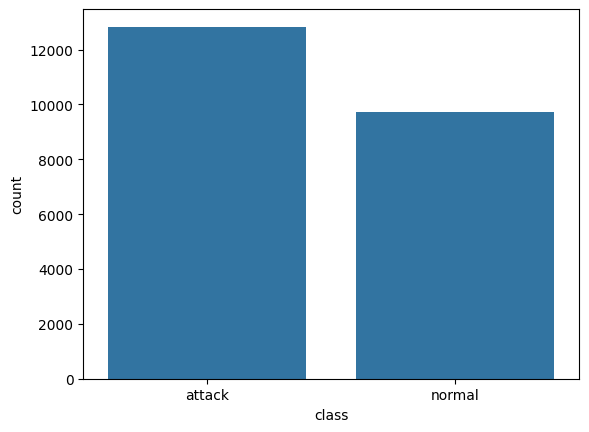

In [22]:
# Create a count plot (a histogram across a categorical variable) using seaborn
# The x-axis represents the different categories in the 'class' column of the 'df_test' dataframe
sns.countplot(x=df_test['class']);

In [23]:
# Reset the index of the 'df_train' dataframe
# The 'drop=True' parameter is used to avoid the old index being added as a column
# The 'inplace=True' parameter means that the changes are made directly in the 'df_train' dataframe
df_train.reset_index(drop=True, inplace=True)

# Reset the index of the 'df_test' dataframe
# The 'drop=True' parameter is used to avoid the old index being added as a column
# The 'inplace=True' parameter means that the changes are made directly in the 'df_test' dataframe
df_test.reset_index(drop=True, inplace=True)

------------------------------

# **3. Preprocessing the Data**

In [24]:
# Define a list 'drop_columns' containing the names of the columns to be dropped from the dataframe
drop_columns = ['srv_serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_same_srv_rate',
 'num_root',
 'num_outbound_cmds',
 'su_attempted']

# Define a function 'preprocess' that takes a dataframe and a list of columns to drop as input
def preprocess(dataframe, to_drop_columns):
    
    # Drop the 'class' column from the dataframe and assign the result to 'x'
    x = dataframe.drop(columns=["class"])
    
    # Drop the columns specified in 'to_drop_columns' from 'x'
    x = x.drop(columns = to_drop_columns)

    # Select the numerical columns from 'x' and assign the result to 'x_num'
    x_num = x.select_dtypes(exclude='object')

    # Assign the 'class' column from the dataframe to 'y'
    y = dataframe["class"]
    
    # Return 'x', 'x_num', and 'y'
    return x, x_num, y

In [25]:
# Preprocess the 'df_train' dataframe using the 'preprocess' function and the 'drop_columns' list
# The returned values are assigned to 'X_train', 'X_train_num', and 'Y_train'
X_train, X_train_num, Y_train = preprocess(df_train, drop_columns)

# Preprocess the 'df_test' dataframe using the 'preprocess' function and the 'drop_columns' list
# The returned values are assigned to 'x_test', 'x_test_num', and 'y_test'
x_test, x_test_num, y_test = preprocess(df_test, drop_columns)

# Print the shapes of 'X_train', 'X_train_num', 'Y_train', 'x_test', 'x_test_num', and 'y_test'
# This is done to check the dimensions of these dataframes/series after preprocessing
print(X_train.shape, X_train_num.shape, Y_train.shape, x_test.shape, x_test_num.shape, y_test.shape)

(125973, 31) (125973, 28) (125973,) (22544, 31) (22544, 28) (22544,)


In [26]:
# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform Y_train
# This will convert the categories to 0 and 1
Y_train_label = label_encoder.fit_transform(Y_train)

# Transform y_test using the same encoder
# This ensures consistency in encoding between training and test sets
y_test_label = label_encoder.transform(y_test)

# The number of classes can be derived from the classes_ attribute of the encoder
n_classes = len(label_encoder.classes_)

print(f"Number of classes: {n_classes}")

# The classes can be retrieved from the encoder's classes_ attribute
print(label_encoder.classes_)

Number of classes: 2
['attack' 'normal']


In [27]:
# Define a function 'evaluate_classification' that takes a model, a name, training data, and test data as input
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):

    # Fit the model using the training data
    model.fit(X_train, y_train)

    # Make predictions on the training data and assign the result to 'y_pred_train'
    y_pred_train = model.predict(X_train)
    
    # Make predictions on the test data and assign the result to 'y_pred_test'
    y_pred_test = model.predict(X_test)

    # Calculate the accuracy of the model on the training data and assign the result to 'train_accuracy'
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # Calculate the accuracy of the model on the test data and assign the result to 'test_accuracy'
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Calculate the macro precision of the model on the training data and assign the result to 'train_precision'
    train_precision = precision_score(y_train, y_pred_train, average='macro')
    
    # Calculate the macro precision of the model on the test data and assign the result to 'test_precision'
    test_precision = precision_score(y_test, y_pred_test, average='macro')
    
    # Calculate the macro recall of the model on the training data and assign the result to 'train_recall'
    train_recall = recall_score(y_train, y_pred_train, average='macro')
    
    # Calculate the macro recall of the model on the test data and assign the result to 'test_recall'
    test_recall = recall_score(y_test, y_pred_test, average='macro')

    # Print the training accuracy, test accuracy, training precision, test precision, training recall, and test recall
    print(f"Training Accuracy {name}: {train_accuracy*100:.2f}%")
    print(f"Test Accuracy {name}: {test_accuracy*100:.2f}%")
    print(f"Training Precision {name}: {train_precision*100:.2f}%")
    print(f"Test Precision {name}: {test_precision*100:.2f}%")
    print(f"Training Recall {name}: {train_recall*100:.2f}%")
    print(f"Test Recall {name}: {test_recall*100:.2f}%")

    # Calculate the confusion matrix for the test data and assign the result to 'confusion_mtx'
    confusion_mtx = confusion_matrix(y_test, y_pred_test)
    
    # Define the labels for the confusion matrix display
    display_labels = ['Normal', 'Attack']
    
    # Create a ConfusionMatrixDisplay object with the confusion matrix and the display labels
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx, display_labels=display_labels)
    
    # Create a new figure and a set of subplots
    fig, ax = plt.subplots(figsize=(10,10))
    
    # Plot the confusion matrix display on the subplots
    cm_display.plot(ax=ax)
    
    # Remove the grid from the plot
    plt.grid(False)
    
    # Display the plot
    plt.show()

    # Return the fitted model
    return model

# You will call the evaluate_classification function like this, for example:
# evaluate_classification(your_model, 'Your Model Name', X_train, X_test, y_train_class, y_test_class)

------------------------------

# **4. Logistic Regression model evaluation**

Training Accuracy Logistic Regression: 94.32%
Test Accuracy Logistic Regression: 74.99%
Training Precision Logistic Regression: 94.31%
Test Precision Logistic Regression: 78.39%
Training Recall Logistic Regression: 94.27%
Test Recall Logistic Regression: 77.21%


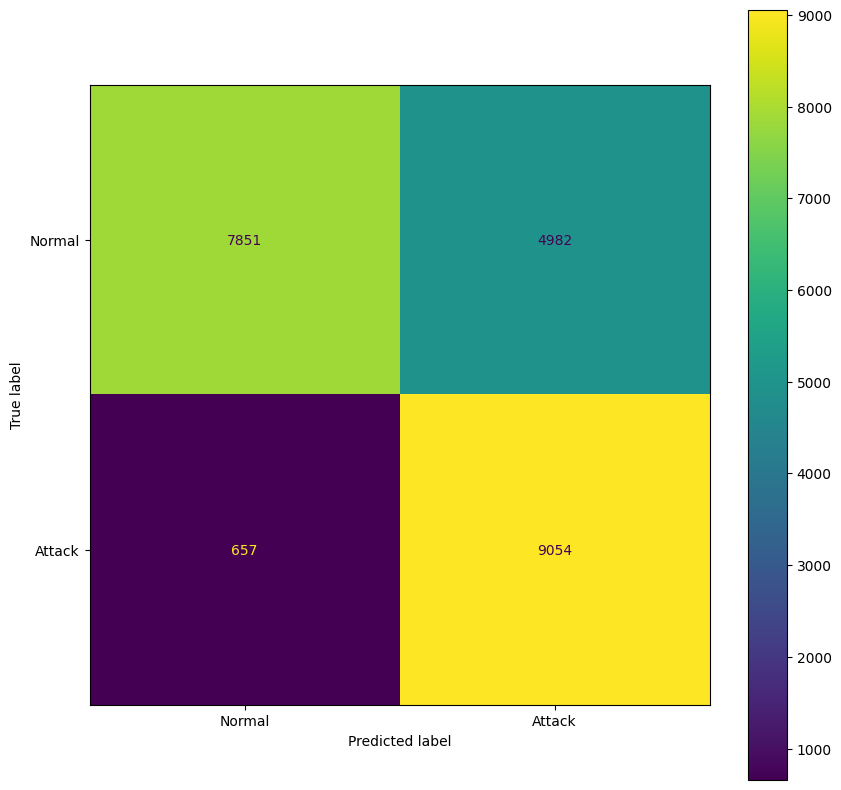

Cross-Validation Accuracy Scores: [0.94173447 0.94232983 0.94554475 0.94284353 0.94379614]
Mean CV Accuracy: 0.94, Standard Deviation in CV Accuracy: 0.00


In [28]:
# Initialize Logistic Regression model with various parameters
lr = LogisticRegression(
    penalty='l2',                # Specifies the norm used in the penalization (regularization). 'l2' is the standard L2 regularization.
    tol=1e-4,                    # Tolerance for stopping criteria. This tells the model when to stop searching for a minimum (convergence).
    C=1,                       # Inverse regularization strength. Smaller values specify stronger regularization.
    fit_intercept=True,          # Specifies if a constant (bias or intercept) should be added to the decision function.
    class_weight=None,           # Weights associated with classes. If None, all classes are supposed to have weight one.
    random_state=42,           # The seed used by the random number generator (for shuffling the data).
    solver='newton-cg',                # Algorithm to use in the optimization problem. For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones.
    max_iter=10000,              # Maximum number of iterations for the solvers to converge.
    n_jobs=8,                 # Number of CPU cores used when parallelizing. None means 1 unless in a joblib.parallel_backend context.
    l1_ratio=None                # The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.
)

# Evaluate the fitted model's performance on both the training and testing datasets
# The 'evaluate_classification' function prints out several metrics and displays a confusion matrix
lr = evaluate_classification(lr, "Logistic Regression", X_train_num, x_test_num, Y_train_label, y_test_label)

# Perform 5-fold cross-validation to assess model's stability and performance across different subsets of the data
# Cross-validation is crucial for verifying the model's ability to generalize to unseen data
cv_scores = cross_val_score(lr, X_train_num, Y_train_label, cv=5, scoring='accuracy')

# Print the accuracy scores obtained from cross-validation
# These scores provide insight into how the model performs on different folds of the training data
print("Cross-Validation Accuracy Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores to get an overall performance metric and its variability
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()
print(f"Mean CV Accuracy: {mean_cv_accuracy:.2f}, Standard Deviation in CV Accuracy: {std_cv_accuracy:.2f}")


------------------------------

# **5. Random Forest model evaluation**

Training Accuracy RandomForestClassifier: 99.99%
Test Accuracy RandomForestClassifier: 77.01%
Training Precision RandomForestClassifier: 99.99%
Test Precision RandomForestClassifier: 81.34%
Training Recall RandomForestClassifier: 99.99%
Test Recall RandomForestClassifier: 79.50%


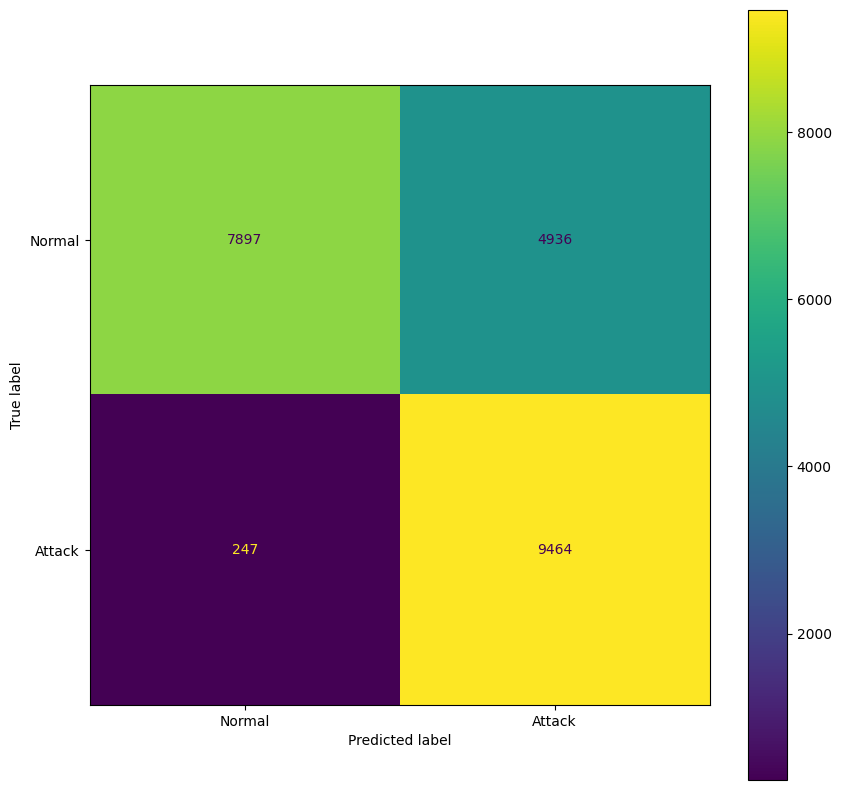

Cross-Validation Accuracy Scores: [0.99825362 0.99853145 0.9979361  0.99825355 0.99876955]
Mean CV Accuracy: 1.00, Standard Deviation in CV Accuracy: 0.00


In [31]:
# Initialize the RandomForestClassifier with various parameters
rf = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest.
    criterion='gini',        # The function to measure the quality of a split. 'gini' for Gini impurity and 'entropy' for information gain.
    max_depth=None,          # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2,     # The minimum number of samples required to split an internal node.
    min_samples_leaf=1,      # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
    max_leaf_nodes=None,     # Grow trees with `max_leaf_nodes` in best-first fashion. Best nodes are defined as relative reduction in impurity.
    min_impurity_decrease=0.0, # A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    bootstrap=True,          # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    oob_score=False,         # Whether to use out-of-bag samples to estimate the generalization accuracy.
    n_jobs=-1,             # The number of jobs to run in parallel. None means 1. -1 means using all processors.
    random_state=None,       # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node.
    verbose=0,               # Controls the verbosity when fitting and predicting.
    warm_start=False,        # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
    class_weight=None,       # Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one.
    ccp_alpha=0.0,           # Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than `ccp_alpha` will be chosen.
    max_samples=None         # If bootstrap is True, the number of samples to draw from X to train each base estimator.
)

# Use the function to fit the model and evaluate it
random_f = evaluate_classification(rf, "RandomForestClassifier", X_train_num, x_test_num, Y_train_label, y_test_label)

# Perform 5-fold cross-validation to assess model's stability and performance across different subsets of the data
# Cross-validation is crucial for verifying the model's ability to generalize to unseen data
cv_scores = cross_val_score(rf, X_train_num, Y_train, cv=5, scoring='accuracy')

# Print the accuracy scores obtained from cross-validation
# These scores provide insight into how the model performs on different folds of the training data
print("Cross-Validation Accuracy Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores to get an overall performance metric and its variability
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()
print(f"Mean CV Accuracy: {mean_cv_accuracy:.2f}, Standard Deviation in CV Accuracy: {std_cv_accuracy:.2f}")

In [32]:
# Get names of numerical columns
numerical_columns = X_train.select_dtypes(include=['number']).columns


## **5.1. Scaling and Encoding the data**

In [33]:

def scale_data_with_training(X_train, X_test, numerical_columns):

    scaler = StandardScaler()
    
    # Fit the scaler on the numerical columns of the training data and transform them
    X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_columns])
    
    # Transform the numerical columns of the testing data using the same scaler
    X_test_numerical_scaled = scaler.transform(X_test[numerical_columns])
    
    # Convert the scaled arrays back to DataFrames
    X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_columns, index=X_train.index)
    X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_columns, index=X_test.index)
    
    # Drop the original numerical columns from the original DataFrames
    X_train_dropped = X_train.drop(columns=numerical_columns)
    X_test_dropped = X_test.drop(columns=numerical_columns)
    
    # Concatenate the scaled numerical DataFrames with the original DataFrames (without the numerical columns)
    X_train_scaled = pd.concat([X_train_dropped, X_train_numerical_scaled_df], axis=1)
    X_test_scaled = pd.concat([X_test_dropped, X_test_numerical_scaled_df], axis=1)
    
    return X_train_scaled, X_test_scaled

# Example usage
# Assuming 'numerical_columns' is a list of your numerical column names
# X_train_scaled, X_test_scaled = scale_data_with_training(X_train, X_test, numerical_columns)


In [34]:
# Call the 'scale_data_with_training' function with the training data, test data, and numerical columns as input
# This function scales the data using the scaling parameters from the training data
# The scaled training data is assigned to 'X_train_scaled' and the scaled test data is assigned to 'x_test_scaled'
X_train_scaled, x_test_scaled = scale_data_with_training(X_train, x_test, numerical_columns)

In [35]:
# Print the shapes of 'X_train_scaled' and 'x_test_scaled'
# This is done to check the dimensions of these dataframes after scaling
print(X_train_scaled.shape, x_test_scaled.shape)

(125973, 31) (22544, 31)


In [37]:
def one_hot_encode_and_align(train_df, test_df, columns_to_encode):
    # Combine train and test dataframes temporarily to ensure consistent one-hot encoding
    combined_df = pd.concat([train_df, test_df], keys=['train', 'test'])
    
    # One-hot encode the specified columns
    combined_df_encoded = pd.get_dummies(combined_df, columns=columns_to_encode)
    
    # Split the combined dataframe back into the original train and test dataframes
    train_df_encoded = combined_df_encoded.xs('train')
    test_df_encoded = combined_df_encoded.xs('test')
    
    # Align the test dataframe to the training dataframe, filling missing columns with zeros
    test_df_encoded = test_df_encoded.reindex(columns=train_df_encoded.columns, fill_value=0)
    
    return train_df_encoded, test_df_encoded

# Apply the function to your dataframes
X_train_encoded, x_test_encoded = one_hot_encode_and_align(X_train_scaled, x_test_scaled, ["protocol_type", "service", "flag"])


## **5.2. Re-evaluating the Random Forrest model with scaled and encoded data**

Training Accuracy RandomForestClassifier: 99.99%
Test Accuracy RandomForestClassifier: 76.87%
Training Precision RandomForestClassifier: 99.99%
Test Precision RandomForestClassifier: 81.22%
Training Recall RandomForestClassifier: 99.99%
Test Recall RandomForestClassifier: 79.36%


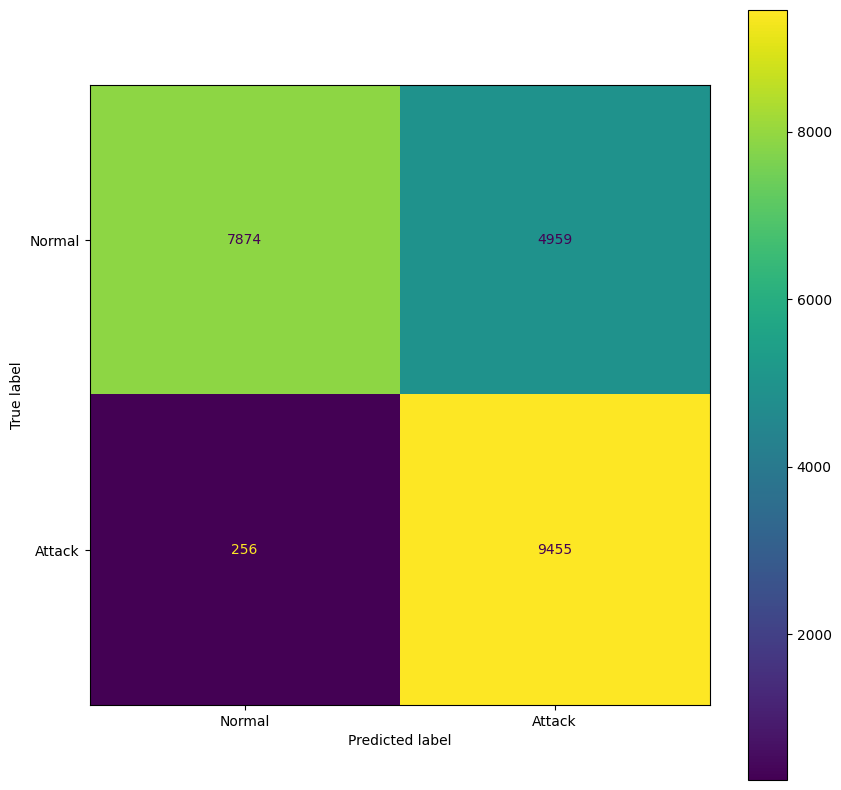

Cross-Validation Accuracy Scores: [0.9987696  0.99912681 0.99888867 0.99896801 0.99888862]
Mean CV Accuracy: 1.00, Standard Deviation in CV Accuracy: 0.00


In [39]:
# Initialize the RandomForestClassifier with various parameters
rf = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest.
    criterion='gini',        # The function to measure the quality of a split. 'gini' for Gini impurity and 'entropy' for information gain.
    max_depth=None,          # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2,     # The minimum number of samples required to split an internal node.
    min_samples_leaf=1,      # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
    max_leaf_nodes=None,     # Grow trees with `max_leaf_nodes` in best-first fashion. Best nodes are defined as relative reduction in impurity.
    min_impurity_decrease=0.0, # A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    bootstrap=True,          # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    oob_score=False,         # Whether to use out-of-bag samples to estimate the generalization accuracy.
    n_jobs=-1,             # The number of jobs to run in parallel. None means 1. -1 means using all processors.
    random_state=None,       # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node.
    verbose=0,               # Controls the verbosity when fitting and predicting.
    warm_start=False,        # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
    class_weight=None,       # Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one.
    ccp_alpha=0.0,           # Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than `ccp_alpha` will be chosen.
    max_samples=None         # If bootstrap is True, the number of samples to draw from X to train each base estimator.
)

# Use the function to fit the model and evaluate it
random_f = evaluate_classification(rf, "RandomForestClassifier", X_train_encoded, x_test_encoded, Y_train_label, y_test_label)



# Perform 5-fold cross-validation to assess model's stability and performance across different subsets of the data
# Cross-validation is crucial for verifying the model's ability to generalize to unseen data
cv_scores = cross_val_score(rf, X_train_encoded, Y_train_label, cv=5, scoring='accuracy')

# Print the accuracy scores obtained from cross-validation
# These scores provide insight into how the model performs on different folds of the training data
print("Cross-Validation Accuracy Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores to get an overall performance metric and its variability
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()
print(f"Mean CV Accuracy: {mean_cv_accuracy:.2f}, Standard Deviation in CV Accuracy: {std_cv_accuracy:.2f}")

In [40]:
# Assume `model` is the trained model you want to save
model_filename = 'rf_model.joblib'

# Save the model
dump(random_f, model_filename)

['rf_model.joblib']

------------------------------

# **6. Using GridSearch to find the best parameters for the RandomForestClassifier**

#                                               **DO NOT RUN THIS UNLESS YOU HAVE A POWERFUL PC**

In [41]:
""" from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def tune_random_forest(X_train, y_train, X_test, y_test, param_grid, cv=5):
    
    #Tune a RandomForestClassifier based on a given set of parameters.

    #:param X_train: Training features
    #:param y_train: Training target
    #:param X_test: Test features
    #:param y_test: Test target
    #:param param_grid: Dictionary with parameters names (`str`) as keys and lists of parameter settings to try as values
    #:param cv: Number of cross-validation folds
    #:return: The best estimator from the grid search
    
    # Initialize the RandomForestClassifier
    rf = RandomForestClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, n_jobs=4, verbose=30)

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # Predict on the test set using the best found parameters
    y_pred_test = grid_search.best_estimator_.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred_test))

    # Return the best estimator
    return grid_search.best_estimator_, grid_search.cv_results_


# Define a more granular parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]                   # Including both options for bootstrapping samples
}

# Call the function
best_rf, cv_results = tune_random_forest(X_train_encoded, Y_train_label, x_test_encoded, y_test_label, param_grid) """

Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 